# Weyl semimetals 
Group meeting talk, Friday Nov. 25th.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from ipywidgets import interact
import warnings
warnings.filterwarnings(action='ignore')

# Weyl fermions

By choosing the correct, so-called *chiral* basis of Dirac matrices $\gamma_{\mu}$ in three-dimensional space (3+1D), the four-component Dirac equation splits into two independent two-component *Weyl* equations of opposite *chirality*:  
$$ i\partial_t \psi = \pm k \cdot \sigma \psi.$$
We can identify this with a Weyl Hamiltonian $H_w = \pm k\cdot \sigma$. The dispersion is $E_w = \pm |k|$. Weyl fermions can be thought of as the two halves of a Dirac fermion. 

Thought to be neutrinos, but neutrinos have mass and Weyl fermions don't. We can still realize them as low-energy excitations in condensed matter systems. 

# Weyl semimetals

## Band crossings

When two non-degenerate bands cross, their Hamiltonian near the crossing point can be approximated by 
$$ H_{cross} = f_0(\mathbf{k}) \sigma_0 + f_i(\mathbf{k})\sigma_i$$
with $f_i$ being arbitrary functions of $\mathbf{k} = k_i \mathbf{e}_i$. 

$f_0$ is just a constant offset, so we set it to $0$ for simplicity. Then, one must in general tune three parameters $f_1,f_2,f_3$ to achieve a band crossing $E_{cross} = 0$. In 3D with 3 independent momenta, this is always possible, and we therefore have gapless points in the bulk. (Think of three planes $f_i = 0$ intersecting).

Expanding near these *Weyl nodes* $\mathbf{k}_0$ as $\delta\mathbf{k} = \mathbf{k}-\mathbf{k}_0$, we find
$$ H_{cross} \approx \mathbf{v}_0 \sigma_0 + \sum_{i=1,2,3} \mathbf{v}_i \cdot \delta \mathbf{k} \sigma_i$$
where $\mathbf{v}_i = \nabla_{\mathbf{k}} f_i(\mathbf{k})$. If $\mathbf{v}_0 = 0$, we obtain the Weyl Hamiltonian $\boxed{H_{cross} = v \delta \mathbf{k} \cdot \sigma}$ where we have expanded $f_i$ linearly!

Moral of the story: non-degenerate band crossings near the Fermi level ($f_0 = 0$) lead to Weyl Hamiltonian.

## Model and bandstructure

In a tight-binding model, we can take $k_i \rightarrow \sin{k_i}$, $k_i^2 \rightarrow 1-2\cos{k_i}$. 

**Careful**: in the continuum, one can define a single Weyl node, since the momentum space is no longer compact. However, in lattice model realizations of Weyl fermions the net chirality must vanish due to periodicity. Therefore, **Weyl nodes always come in pairs**. (Half of electron).

An appropriate Weyl lattice Hamiltonian is therefore two copies of $H_w$, seperated in momentu space by some distance:
$$ H = \sin{k_x}\sigma_x + \sin{k_y}\sigma_y + (2 + \gamma - \cos{k_x}-\cos{k_y}-\cos{k_z})\sigma_z.$$
The two Weyl nodes are at $\mathbf{k} = (0,0,\pm \arccos{\gamma})$. Check: expanding near these points recovers $H_w$.

In [2]:
import binder_tools as bt
%load_ext autoreload
%autoreload 2

@interact(kx=(-np.pi,np.pi,0.01),ky=(-np.pi,np.pi,0.01),g=(-2,2,0.01))
def BulkSpectrumWidgetInteract(kx=0,ky=0,g=0):
    fig = bt.BulkSpectrumWidget(kx,ky,g)
    
print("Go back to notebook for some interactive plots!")
    
# BulkSpectrumWidgetInteract(kx=0,ky=0,g=-1)

# BulkSpectrumWidgetInteract(kx=0,ky=0,g=-0.5) 
    
# BulkSpectrumWidgetInteract(kx=0,ky=0,g=0) 

# BulkSpectrumWidgetInteract(kx=0,ky=0,g=0.5) 
    
# BulkSpectrumWidgetInteract(kx=0,ky=0,g=1) 


interactive(children=(FloatSlider(value=0.0, description='kx', max=3.141592653589793, min=-3.141592653589793, …

Go back to notebook for some interactive plots!


The Chern number between the Weyl nodes is nonzero, and outside is zero.

<Figure size 432x288 with 0 Axes>

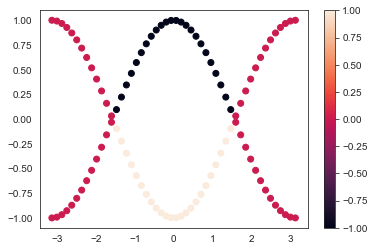

In [3]:
ks,es,cs = bt.BulkSpectrumChern(kx=0,ky=0,g=0,res=50)

plt.figure()
fig,ax=plt.subplots()
scat = ax.scatter(ks,es,c=cs)
plt.colorbar(scat)
plt.show()

## Fermi arc

This is related to the Quantum Anomalous Hall effect in 2D (treat each $k_z$ slice as an effective 2D Quantum Spin Hall insulator). Points broadly to a non-trivial bulk-boundary correspondence for parameters $|k_z| < \arccos{\gamma}$.

To see what is happening on the surface, we open it along $y$ and plot it again.

<Figure size 432x288 with 0 Axes>

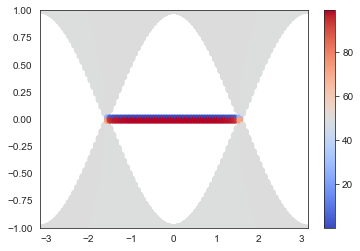

In [4]:
ks_fin, es_fin, ys_fin = bt.SpectrumFiniteY(size=100,res=100,kfix=0.01,g=0,k_dir=3)

plt.figure()
fig,ax=plt.subplots()
scat = ax.scatter(ks_fin,es_fin,c=ys_fin,cmap='coolwarm')
ax.set_xlim(-np.pi,np.pi)
ax.set_ylim(-1.,1.)
plt.colorbar(scat)
plt.show()

To see how these states disperse, plot them along $k_x$:

<Figure size 432x288 with 0 Axes>

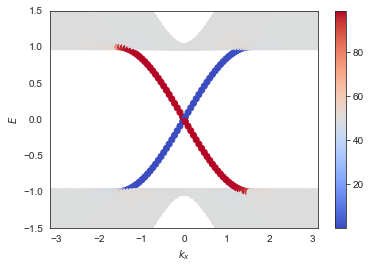

In [5]:
ks_fin, es_fin, ys_fin = bt.SpectrumFiniteY(size=100,res=100,kfix=0,g=0,k_dir=1)
plt.figure()
fig,ax=plt.subplots()
scat = ax.scatter(ks_fin,es_fin,c=ys_fin,cmap='coolwarm')
ax.set_xlim(-np.pi,np.pi)
ax.set_xlabel(r"$k_x$")
ax.set_ylabel(r"$E$")
ax.set_ylim(-1.5,1.5)
plt.colorbar(scat)
plt.show()

Similar to bulk zeroth Landau level: flat in the "Gauge field" direction, disperses linearly in magnetic field direction. 

## Interface density of states
We introduce the spectral density of states to visualize states at specific $y$-positions:

In [111]:
size = 50
res=100
kz = 0

As = np.zeros((res,res),dtype=float)

for i in range(res):
    kx = np.linspace(-np.pi,np.pi,res)[i]
    As[:,i] = bt.FullSpectralFunctionWeylWK(size=size,res=res,wrange=1.5,kx=kx,kz=kz,g=0,tm=1,mu=-4,r=0,spin=0,side=1)
    

<Figure size 432x288 with 0 Axes>

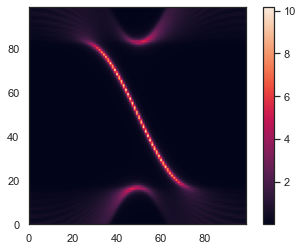

In [116]:
plt.figure()
fig,ax=plt.subplots()
scat = ax.imshow(As)
ax.set_xlim(0,res-1)
ax.set_ylim(0,res-1)
plt.colorbar(scat)
plt.show()

In momentum space, this looks like:

In [118]:
As = np.zeros((res,res),dtype=float)

for i in range(res):
    kx = np.linspace(-np.pi,np.pi,res)[i]
    As[:,i] = bt.FullSpectralFunctionWeylKK(size=size,res=res,krange=np.pi,kx=kx,w=0,g=0,tm=1,mu=-4,r=0,spin=0,side=1)
    

<Figure size 432x288 with 0 Axes>

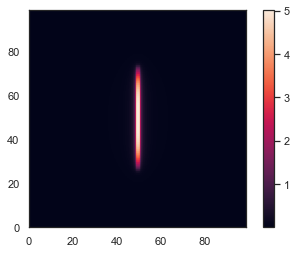

In [119]:
plt.figure()
fig,ax=plt.subplots()
scat = ax.imshow(As)
ax.set_xlim(0,res-1)
ax.set_ylim(0,res-1)
plt.colorbar(scat)
plt.show()

On the surface, the states lie on an arc between the two Weyl nodes. 

This is the *Fermi arc*, a surface projection of the Berry flux. 

It is due to the gapless feature of the bulk. 

Normally, we expect a 2D Fermi surface for 3D metals. WSM is special in this sense.

# Continuum theory

Keeping $\mathcal{O}\left(k_y^2\right)$ terms in $H_w \psi = E \psi$ and letting $k_y = -i\partial_y$ yields the differential equation
\begin{equation}
\label{eq:surfacetise}
    {\partial_y \psi } + \frac{\sigma_x}{2}{\partial^2_y \psi} = i\sigma_y(E - \sin{k_x}\sigma_x)\psi + h_z \sigma_x \psi
\end{equation}
Take the interface to be at $y=0$ and make the ansatz ${\psi} \propto e^{\kappa y} {\phi}$, where ${\phi}$ is an unspecified spinor. 

Require $\mathrm{Re}\left(\kappa\right) > 0$ to ensure a vanishing amplitude away from the interface. We get two positive solutions for $\kappa$:
\begin{equation}
\label{eq:decayparameters}
    \kappa_{\pm}^2 = 2\left(1 + h_z\right) \pm 2 \left[{1 + 2h_z + E^2 - \sin{k_x}^2}\right]^{\frac{1}{2}}.
\end{equation}

In general, one has the superposition ${\psi} \propto e^{\kappa_+ y} {\phi}_{\kappa_+} + \alpha e^{\kappa_- y} {\phi}_{\kappa_-}$. 

Boundary condition: ${\psi(0)} = 0$. Therefore, $\alpha = -1$ and ${\phi}_{\kappa_+} = {\phi}_{\kappa_-}$ up to a phase:
\begin{equation}
     \left.\frac{\phi_{1}}{\phi_{2}}\right|_{\kappa_{+}}=\left.\frac{\phi_{1}}{\phi_{2}}\right|_{\kappa_{-}}.
\end{equation}
<!-- or
\begin{equation}
\label{eq:ratioofspinorscontinuum}
    \frac{E + h_z - \kappa_{+}^2 / 2}{\sin{k_x}+\kappa_{+}} = \frac{E + h_z - \kappa_{-}^2 / 2}{\sin{k_x}+\kappa_{-}}.
\end{equation} -->
Solving this, we recover the aforementioned chiral state of energy $E = -t\sin{k_x}$ and decay parameters $\kappa_{\pm} = 1 \pm \sqrt{1 + 2 h_z}$ with spin $\sigma_x = -1$:
\begin{equation}
    \psi_{\mathrm{chiral}} \propto
    e^{ik_x+ik_z z}\left( e^{\kappa_+ y} - e^{\kappa_- y}\right)  \begin{pmatrix}
    1 \\
    -1
    \end{pmatrix}.
\end{equation}
The condition of $\mathrm{Re}\left(\kappa\right) > 0$ leads to 
\begin{equation}
    \gamma < \cos{k_z},
\end{equation}
the Fermi arc.

# Lattice theory

<!-- \begin{equation}
\label{eq:wsmhamiltonianfinite}
    {H}_w = \sum_{y=0}^{L_y-1} c^{\dagger}_{y} h_w c_{y} + \left(c^{\dagger}_{y+1} R^{\dagger}_w c_{y} + \mathrm{h.c.} \right)
\end{equation}
with 
\begin{gather}
    h_w = t_x \sin{k_x} \sigma_x + t_z \left(2 + \gamma - \cos{k_x} - \cos{k_z}\right)\sigma_z, \\
    R_w = \frac{i t_y}{2} \sigma_y - \frac{t_z}{2}\sigma_z.
\end{gather} -->

In a discrete formalism, $H_w \varphi_w = E\varphi_w$ can be understood as a set of coupled difference equations relating the wavefunction $\varphi_w(y)$ to its nearest neighbours $\varphi_w(y \pm 1)$, 
\begin{equation}
    E\varphi_w(y) = h_w \varphi_w(y) + R^{\dagger}_w \varphi_w(y+1) + R_w \varphi_w(y-1) 
\end{equation}

Take the ansatz
\begin{equation}
\label{eq:wsmdiscreteansatz}
    \varphi_w (y) = \ell^{y}  {\phi_w} .
\end{equation}
 
Plugging it in, we obtain the matrix equation
\begin{align}
\label{eq:bulkdifferenceequationWSM}
0 = \left(E - g_1\sigma_z + g_3\sigma_x -t\ell^{-1}\sigma_+ - t\ell\sigma_-\right)\phi_w
\end{align}

where $\sigma_{\pm} = \left(\sigma_x \pm i \sigma_y \right)/2$. 

Setting the determinant of this matrix to zero yields $w \equiv \phi_w^{\uparrow}/\phi_w^{\downarrow}$ and $E$:
\begin{gather}
w = \frac{E +g_1}{t \ell - g_3} = \frac{t\ell^{-1} - g_3}{E - g_1}, \\
\label{eq:discretebulkenergy}
E = \sqrt{ g_1^2 +g_3^2 +t^2 -g_3 t \left(\ell + \ell^{-1}\right)}.
\end{gather}

With the assumption $\phi_{\uparrow} = 0$ ($\sigma_x = -1$), we find a solution with $\ell = t / g_3$ and $E = - g_1$. Impose $\mathrm{Re}\left(\ell_{\pm} \right) > 1$, leading to $t/g_3 > 1$, or $1+\gamma < \cos{k_x} + \cos{k_z}$. 

$\gamma < \cos{k_z}$ then follows naturally, confirming the presence of the chiral state on the Fermi arc. 

# Tunnelling

We know there is a single state at each surface and we know what it looks like: $E= -\sin{k_x}$, $\sigma_x = -1$, decays exponentially.

How will this state change if we allow for tunnelling to another material? 

Simplest material: normal band $H_m = -2t_m\sum_i\cos{k_i}\sigma_0 - \mu\sigma_0$ (metal). 

Simplest tunnelling: non-magnetic tunnelling $T = \Delta \sigma_0$ localized to the interface sites.

At first glance, we should not expect to see any spin-dependent behaviour.

## Exact surface propagator

We can exactly integrate out the metal degrees of freedom. Dynamics are controlled by amplitude $ \int e^{S}$ where
$$ S = \varphi^{\dagger}(i\omega_n - H_w)\varphi + \Phi^{\dagger}(i\omega_n - H_m)\Phi + \varphi^{\dagger}T^{\dagger}\Phi + \Phi^{\dagger} T \varphi.$$
Can complete the square in the exponential for the $\mathcal{D}[\Phi^{\dagger},\Phi]$ integration. Result is
$$ S_{eff} = \varphi^{\dagger}(i\omega_n - H_w)\varphi - \varphi^{\dagger}T^{\dagger}(i\omega_n - H_m)^{-1}T\varphi$$
which defines an effective propagator/Hamiltonian:
$$ G_{eff}^{-1} = i\omega_n - H_w - T^{\dagger}(i\omega_n - H_m)^{-1}T.$$
Using the forms of our potentials we can get an explicit form for $T^{\dagger}(i\omega_n - H_m)^{-1}T$.

What we expect and find: tunnelling lowers energy (hopping on more sites, wavefunction spreading).

## Numerical results

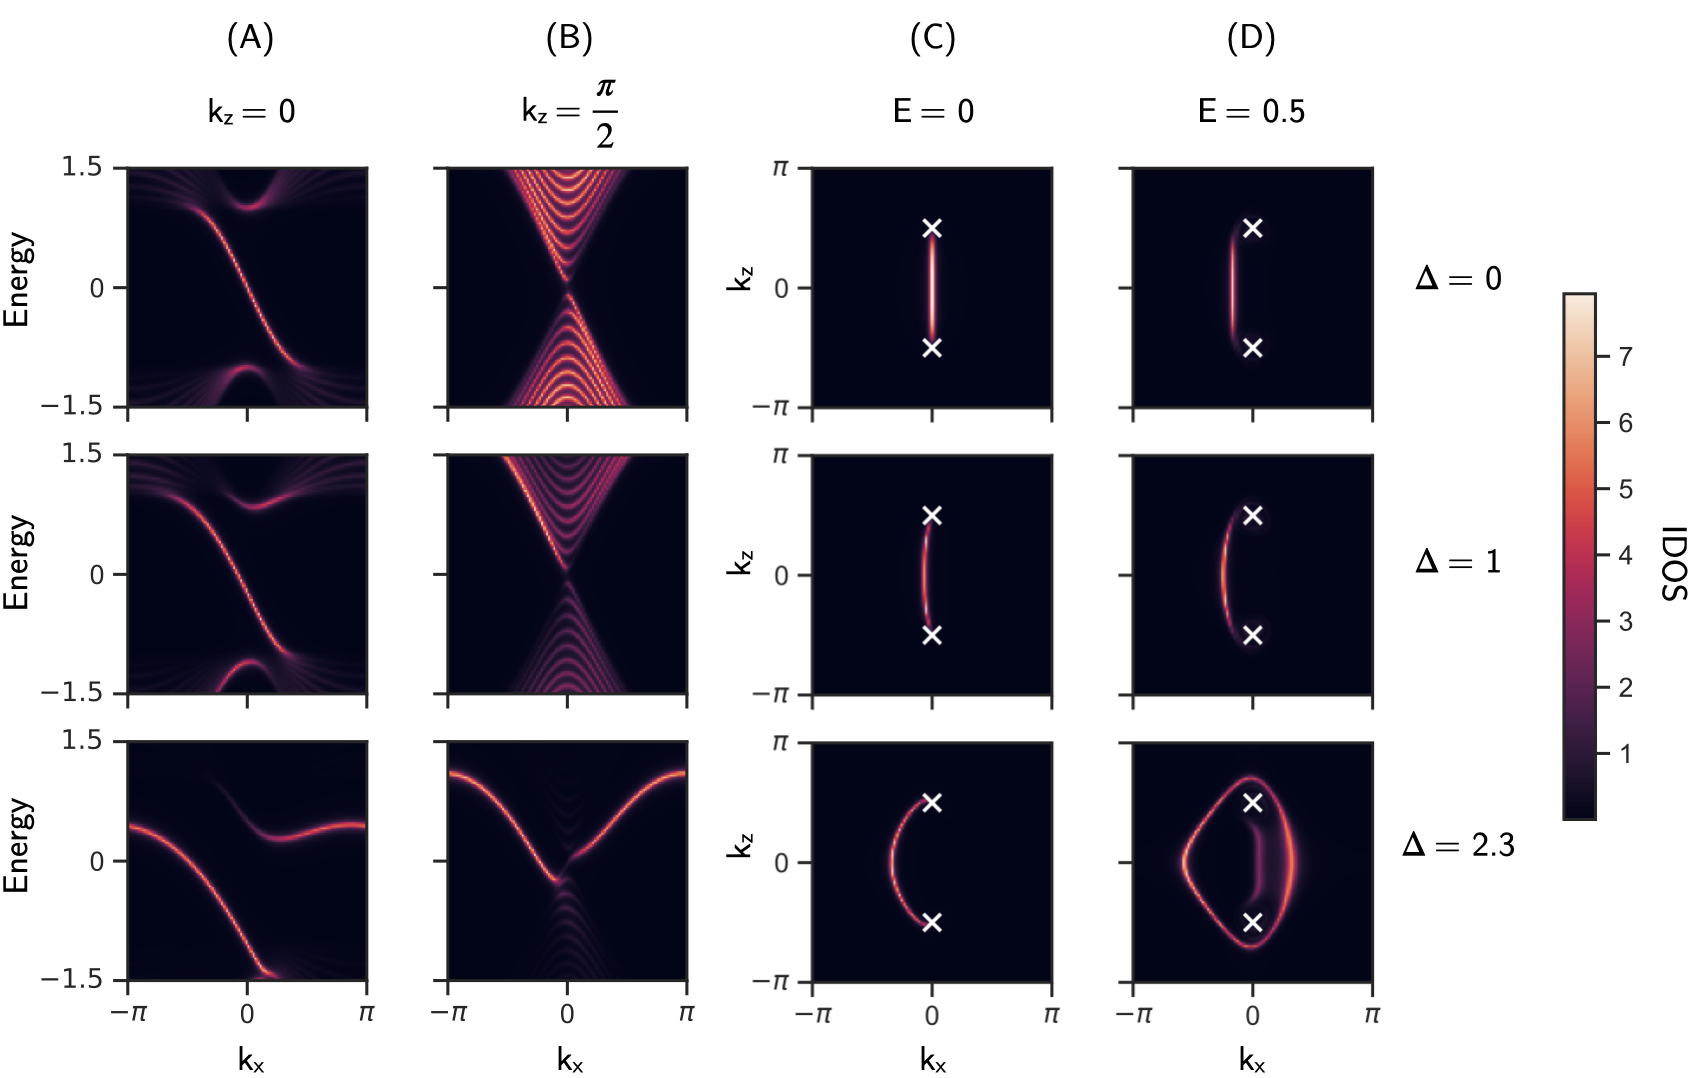

<!-- <div>
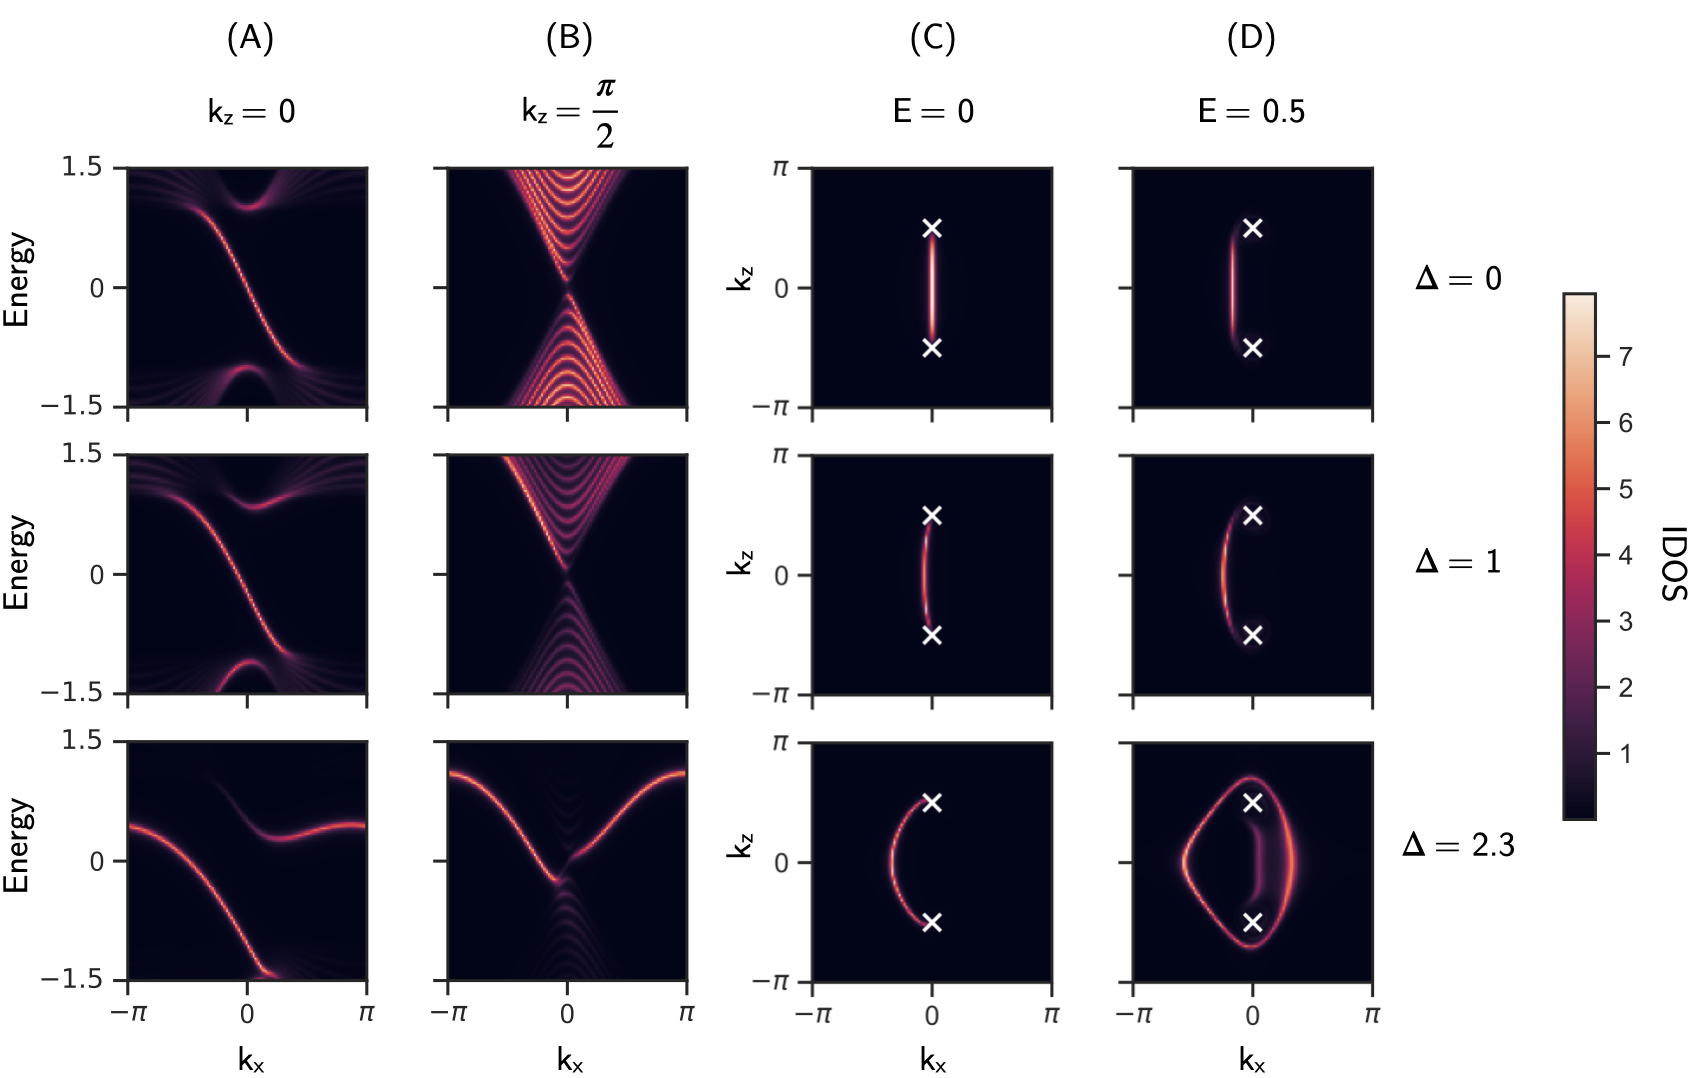
</div> -->

What we don't expect: spin-dependent asymmetry at the Weyl node. Turns out, non-magnetic tunnelling to a non-magnetic band *can* have spin-dependent results, because the WSM's surface *is* spin-polarized.

To make this quantitative, we can look at the spin of the chiral state at the interface as tunnelling increases:
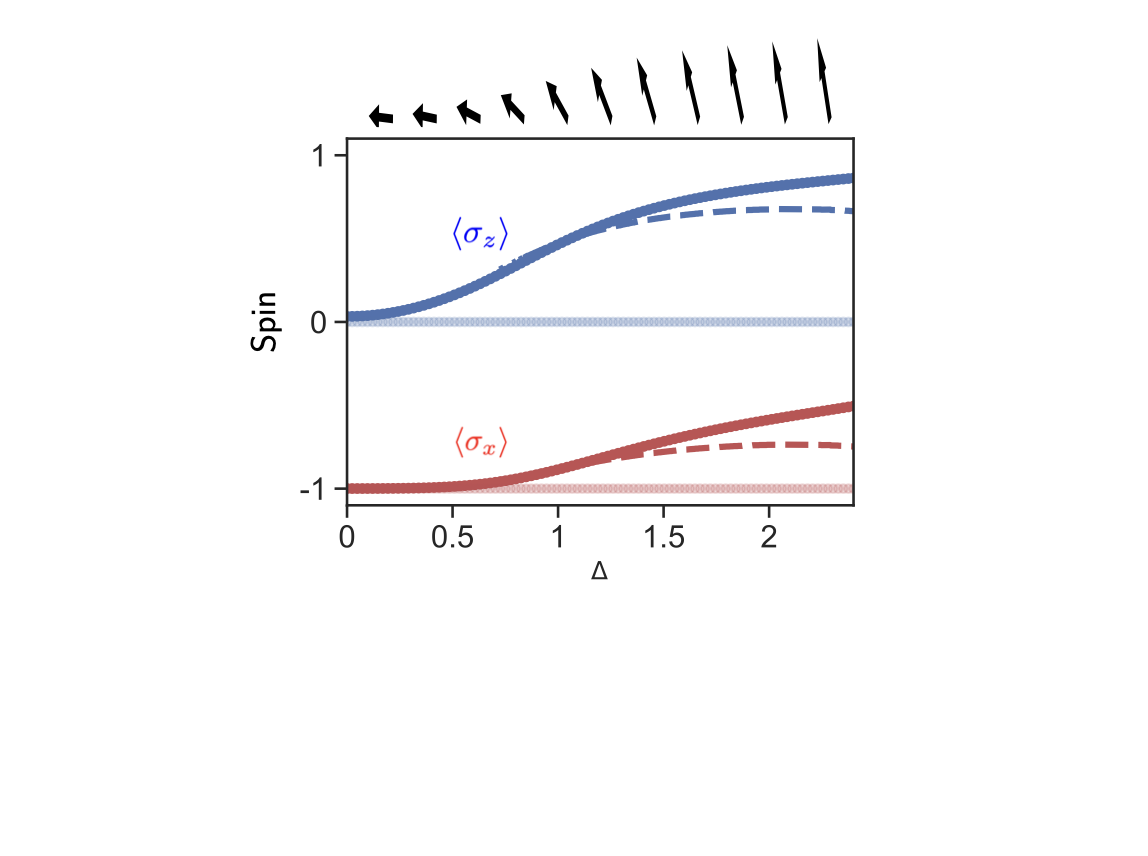
<!-- <div>
<img src="attachment:spinstunnelling.png" width="300"/>
</div> -->

The asymmetry at the Weyl node (which is fully dependent on the presence of a Fermi arc) is of particular interest. 

The state on the left is the chiral state which just lowered in energy. The state on the right is a previously extended bulk state which localized to the interface.

It hints at some pretty interesting transport properties for electrons moving along $x$, since $v_x = \partial_{k_x} E$ has a discontinuity at $k_x = 0$. 

**We expect to see nonzero conductance at the Weyl node when there is tunnelling**. 

This can also be reasoned by looking at the Fermi arc which goes beyond the Weyl nodes at $E=0$.

## Numerical results with theory overlayed

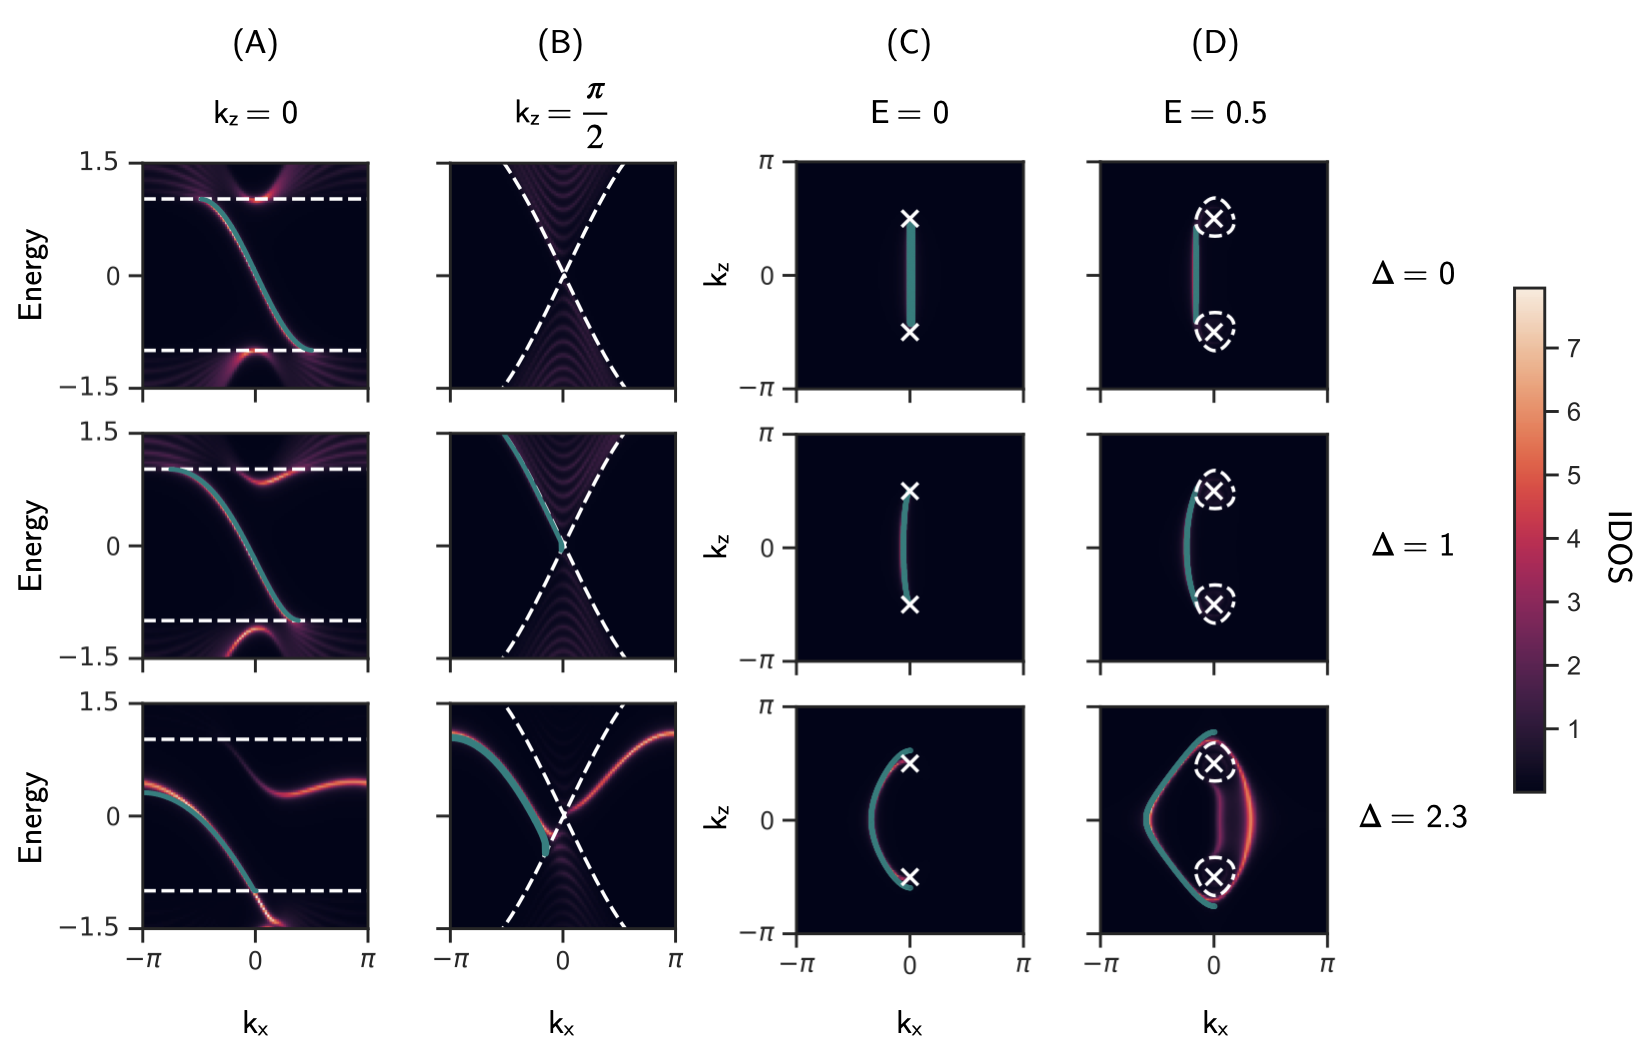
<!-- <div>
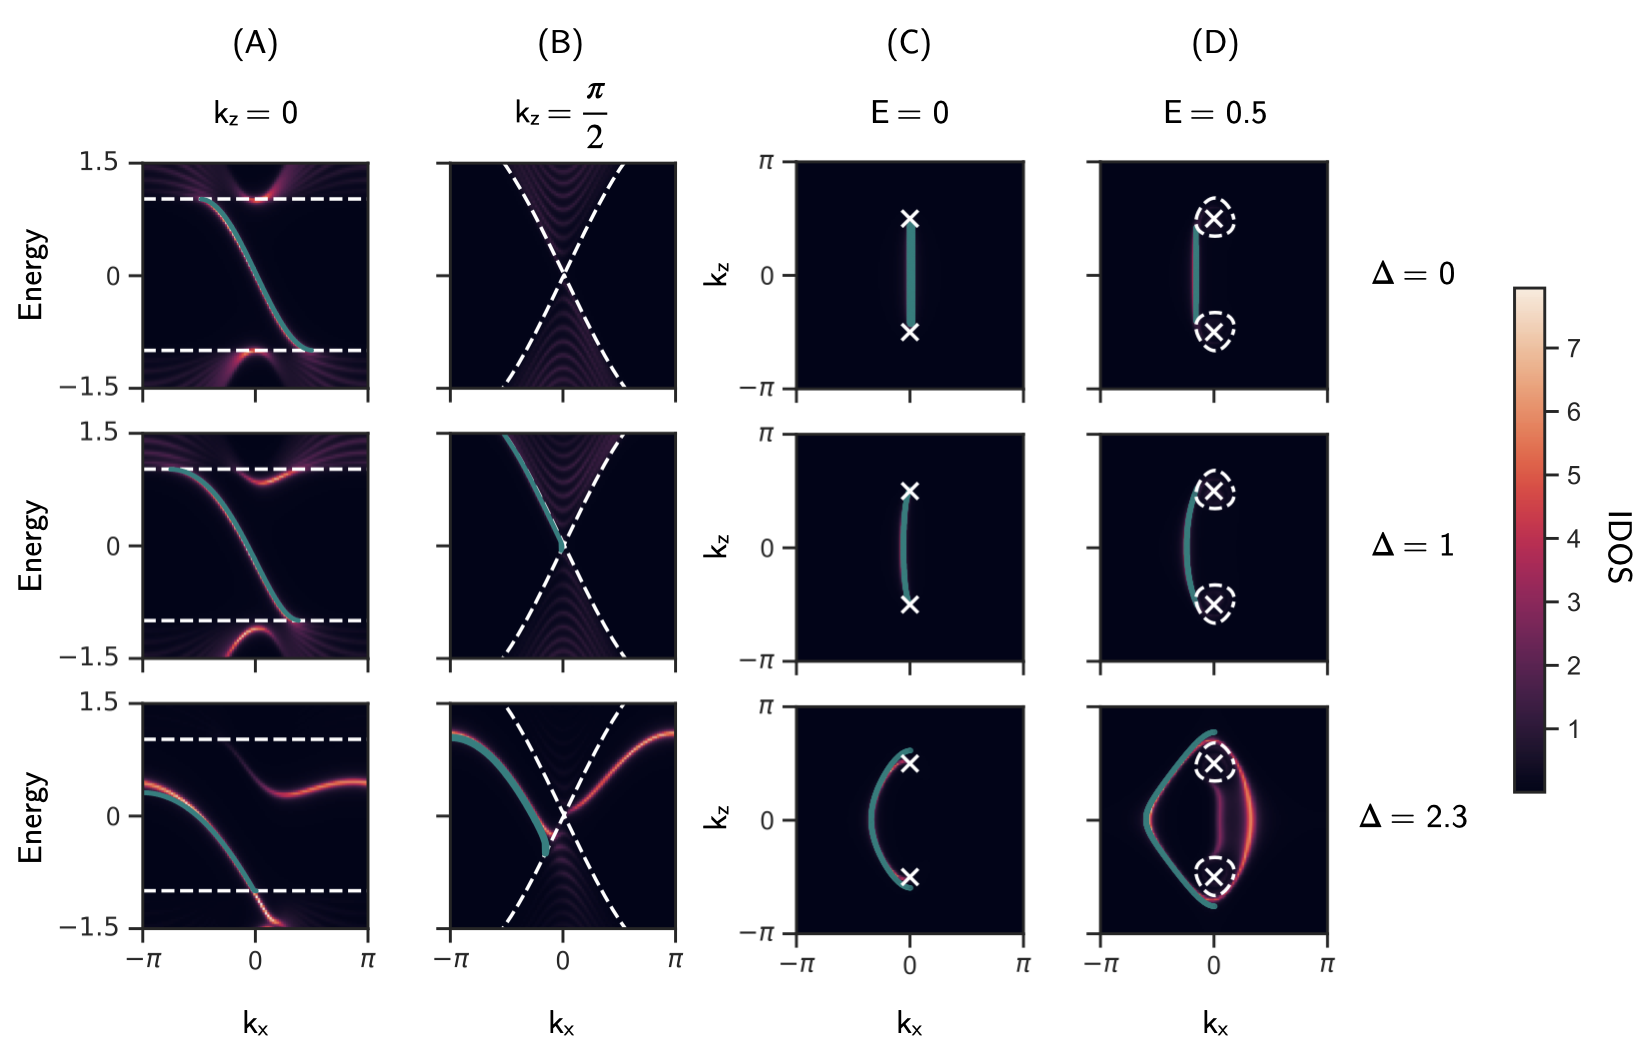
</div> -->

Our theory is quite good for the chiral state. Though it can explain the existence of *emergent interface states*, it cannot predict their behaviour quantitatively. 

# Transport

## Along the interface

As we said before, we expect some interesting results for conductance *along* the interface (due to the modified chiral state/group velocity).

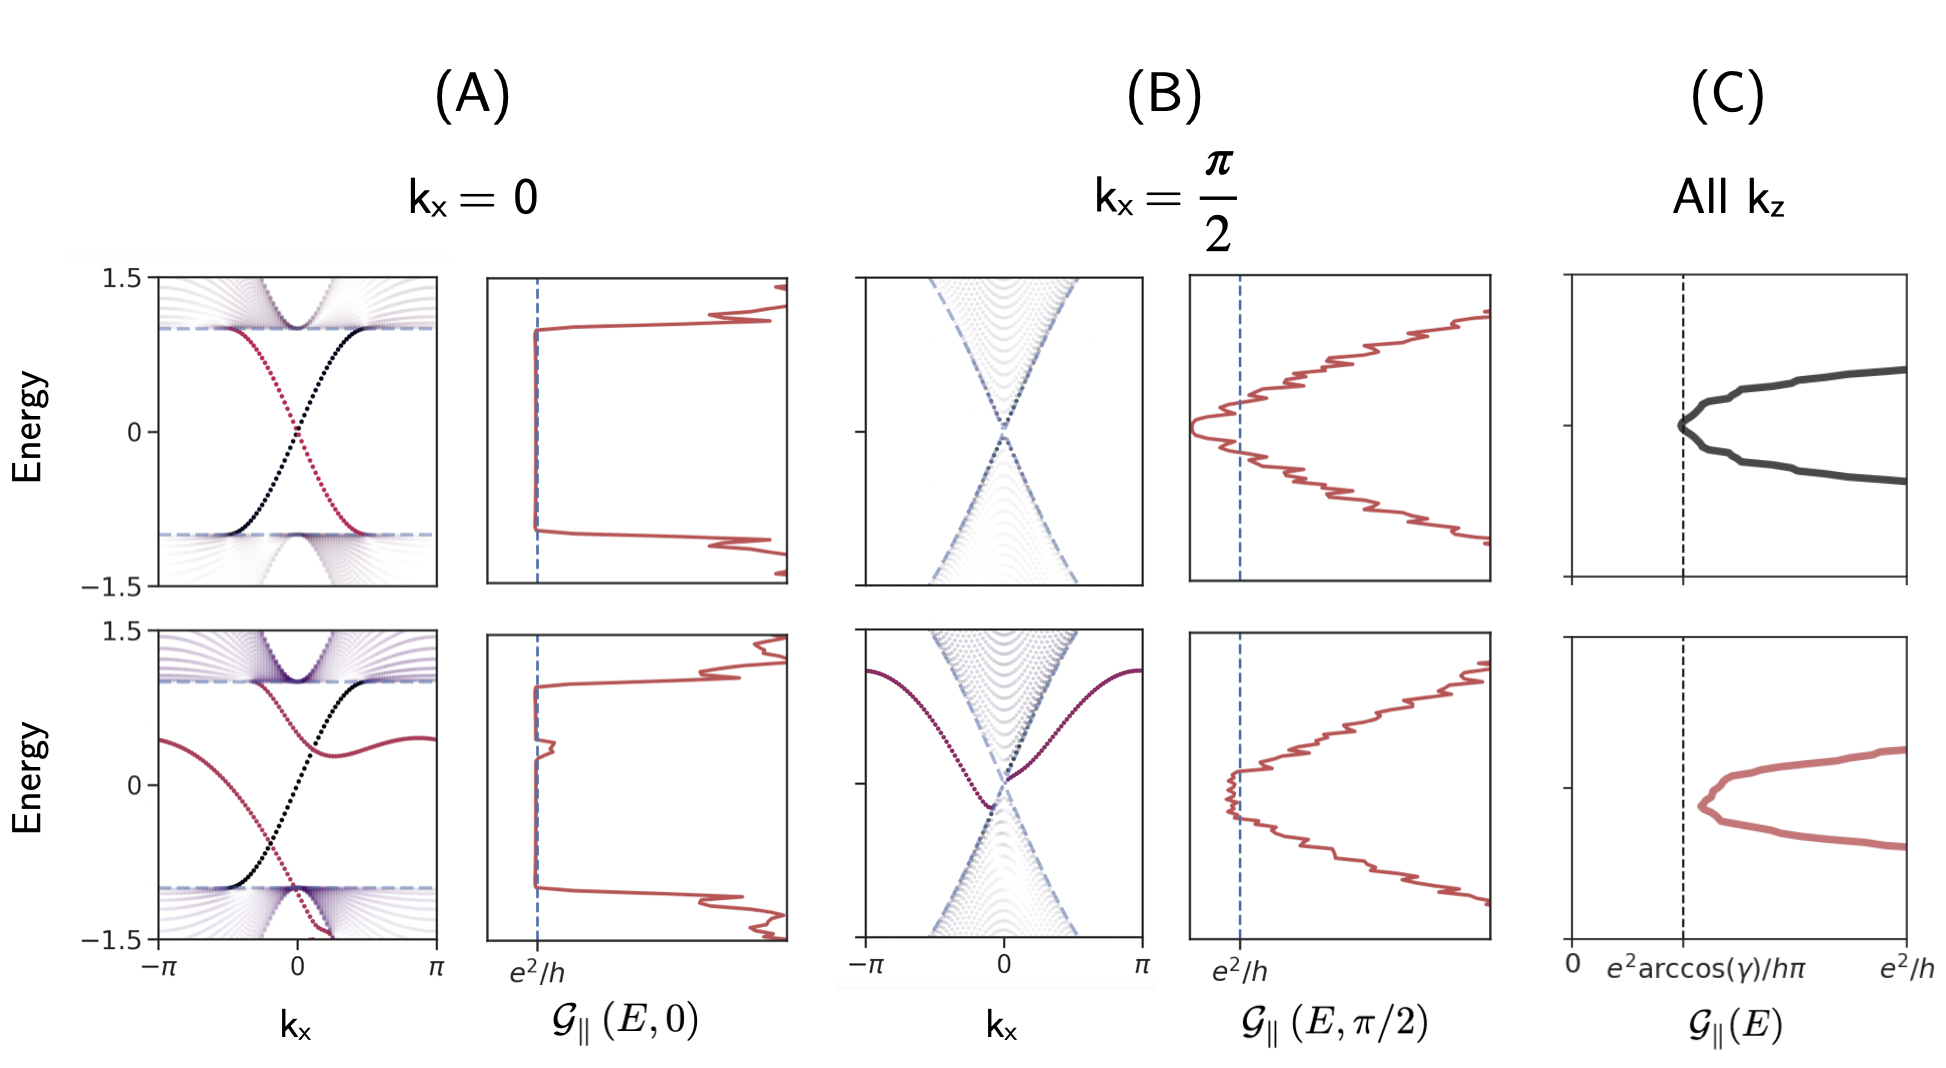

<!-- <div>
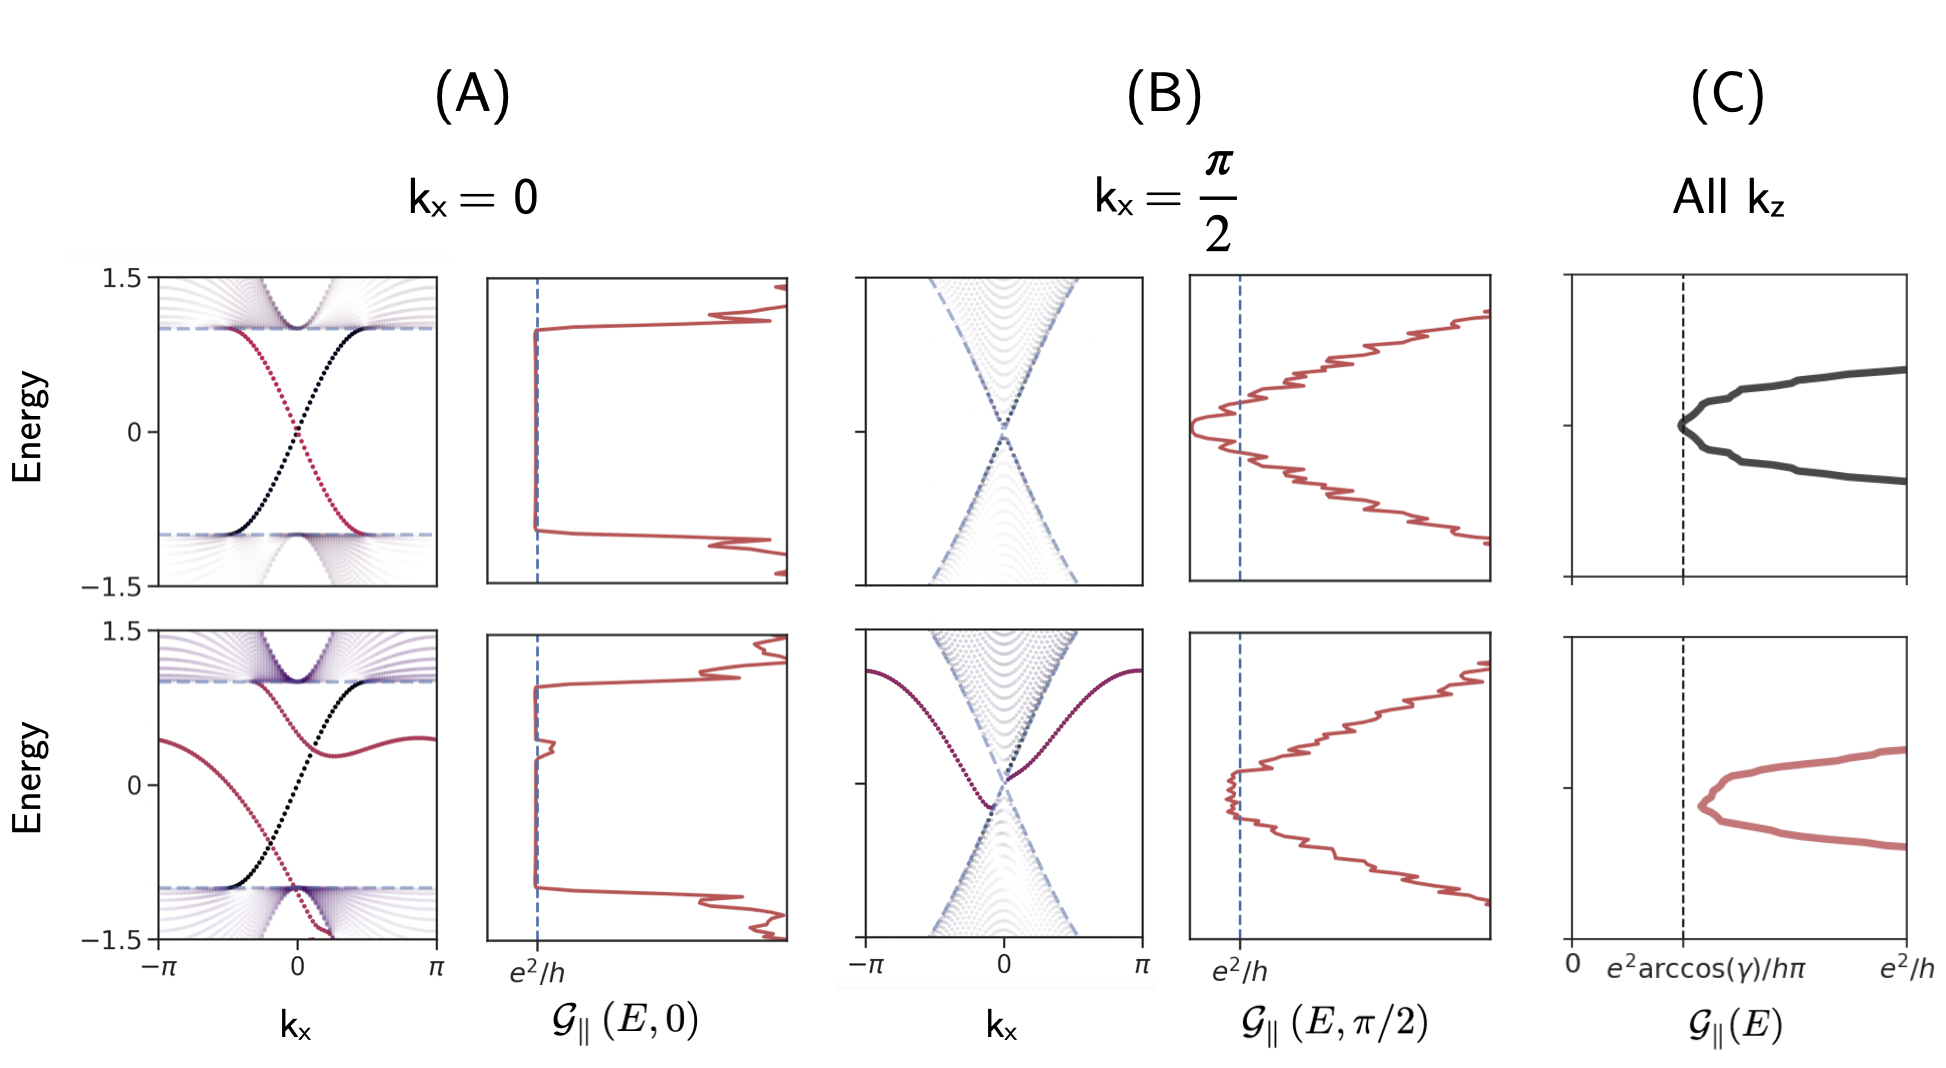
</div> -->

## Across the interface

Across the interface, we don't expect to see any spin-dependence or asymmetry. Going through the electron tunnelling formalism (reference: Mahan, Many-Particle Physics) we obtain
\begin{equation}
\label{eq:conductanceacross}
    \mathcal{G}_{\perp}\left(eV\right) = \frac{e^2}{h} \frac{m \Delta^2}{v^2} eV \log\left|\frac{1 + eV / \alpha}{1 - eV / \alpha}\right|.
\end{equation}

For small voltages $eV \ll \sqrt{2 m v^2 \mu} \equiv \varepsilon$, the conductance has a leading order term quadratic in $V$:
\begin{equation}
    \mathcal{G}_{\perp}\left(eV\right) = \frac{e^2}{h} \frac{2 m \Delta^2}{v^2 \varepsilon} \left(eV\right)^2 .
\end{equation}
This is in accordance with the underlying philosophy that tunnelling measurements with featureless metals reveal the density of states near the Fermi level, since the WSM's linear dispersion corresponds to a density of states $\propto E^2$.

# Conclusions 
- The minimal WSM has a Fermi arc linking its two Weyl nodes (two halves of an electron).
- In between these nodes, there is a nonzero Berry flux (produces quantum anomalous Hall effect).
- In an open system, it will host two chiral states: one on each surface.
- If we allow for tunnelling to a non-magnetic band:
    - the energies are lowered,
    - an extended state localizes to the interface to produce an asymmetry with the chiral state,
    - the Fermi arc extends beyond the bare Weyl nodes (though it still terminates there),
    - $G = e^2/h$ for energies between the asymmetry,
    - As we expect, electron tunnelling reveals density of states.

# Thank you!

# Questions?